# Student Performance Indicator: Exploratory Data Analysis

### About the Dataset
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

**Source:** https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### Description
- **gender:** Sex of students
- **race/ethnicity:** Indicates the ethnicity of students
- **parental level of education:** Parents' final education 
- **lunch:** Type of lunch the student had before test
- **test preparation course:** Tells whether the course was completed before the test or not
- **math score:** Math's score of the student
- **reading score:** Reading's score of the student
- **writing score:** Writing's score of the student

### Objective
Our objective is to predict a student's math score on the test they underwent.

## 1. Importing libraries

In [18]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='rainbow')

# Stats
import scipy.stats as stats

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

# Configuring some settings
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

## 2. Getting the dataset

In [2]:
# Creating a dataframe
df = pd.read_csv('./data/Students_Performance.csv')
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
909,male,group E,bachelor's degree,standard,completed,70,64,70
98,female,group D,some college,free/reduced,none,58,67,62
841,male,group C,some high school,standard,none,64,58,51
327,male,group A,some college,free/reduced,none,28,23,19
667,female,group B,bachelor's degree,free/reduced,none,77,85,87


## 3. Exploratory Data Analysis

### 3.1 Basic information

In [3]:
# Getting the shape of the dataset
df.shape

(1000, 8)

In [4]:
# Getting information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Finding total nos. of duplicated rows
df.duplicated().sum()

0

In [6]:
# Describing the numerical features data mathematically
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Text(0.5, 1.0, 'Correlation between numerical features in the dataset')

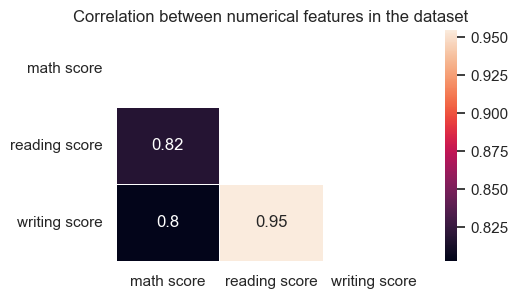

In [7]:
# Correlation between different numerical features
plt.figure(figsize=(5,3))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, linewidths=.5, mask=mask).set(facecolor = 'white')
plt.title("Correlation between numerical features in the dataset")

### 3.2 Target feature

Text(0.5, 1.0, 'QQ Plot of math score')

<Figure size 800x400 with 0 Axes>

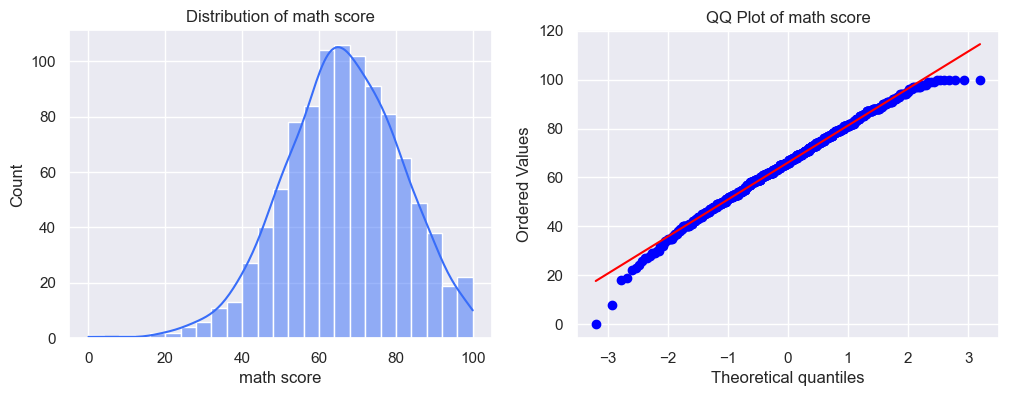

In [8]:
# Plotting distribution of target features
plt.figure(figsize=(8,4))
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Distribution of continuous features
sns.histplot(data=df, x='math score', ax=ax[0], kde=True)
ax[0].set_title(f"Distribution of math score")

# QQ Plot of continuous features
stats.probplot(df['math score'],dist='norm',plot=plt)
ax[1].set_title(f"QQ Plot of math score")

In [9]:
# Skewness and Kurtosis
print(f"Skewness: {df['math score'].skew()}")
print(f"Kurtosis: {df['math score'].kurt()}")

Skewness: -0.27893514909431694
Kurtosis: 0.27496405752108455


### 3.3 Numerical features

In [10]:
# Extracting all the numerical features
numerical_features = [feature for feature in df.select_dtypes(exclude='object').columns if feature not in ['math score']]

print(f"Total nos. of numerical features are: {len(numerical_features)}")
print("List of all numerical features are:")
numerical_features

Total nos. of numerical features are: 2
List of all numerical features are:


['reading score', 'writing score']

In [11]:
# Finding total nos. of unique values in all the numerical features
def numerical_unique_counts():
    for feature in numerical_features:
        print(f"Total nos. of unique values in {feature} feature are: {len(df[feature].unique())}")
        print()

numerical_unique_counts()

Total nos. of unique values in reading score feature are: 72

Total nos. of unique values in writing score feature are: 77



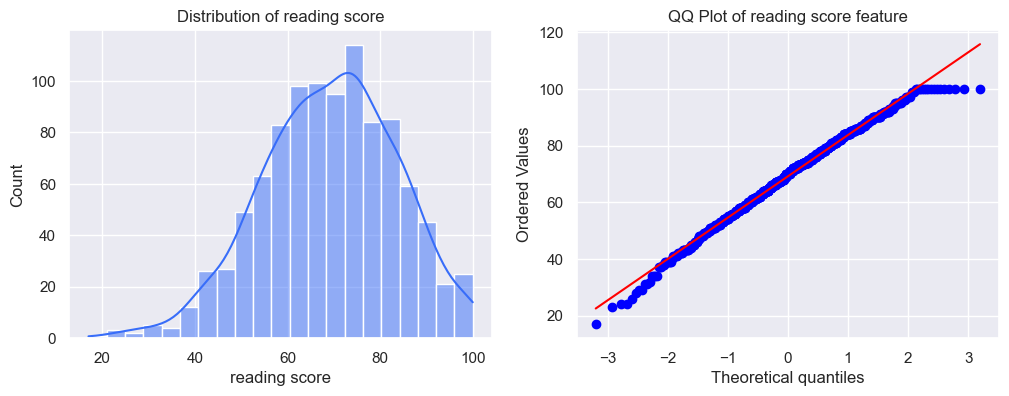

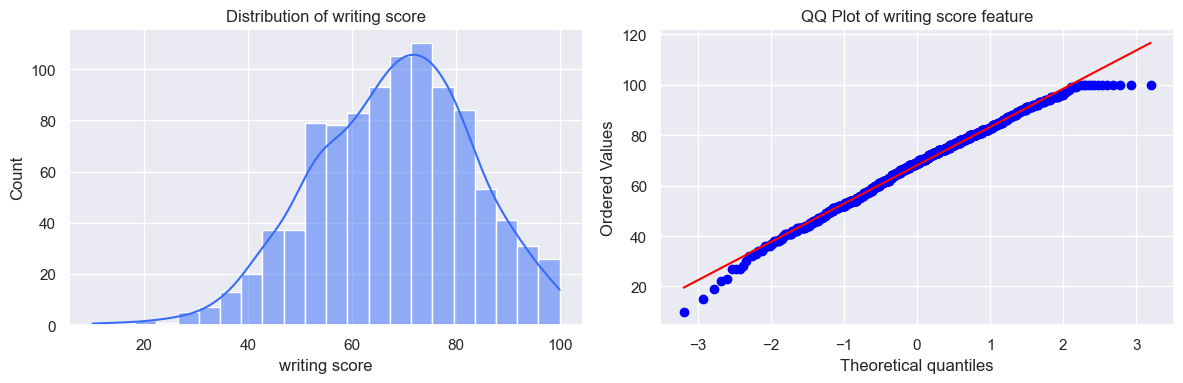

In [12]:
# Plotting distributions of numerical features
for feature in numerical_features:
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    # Distribution of numerical features
    sns.histplot(data=df, x=feature, ax=ax[0], kde=True)
    ax[0].set_title(f"Distribution of {feature}")

    # QQ Plot of numerical features
    stats.probplot(df[feature],dist='norm',plot=plt)
    ax[1].set_title(f"QQ Plot of {feature} feature")
plt.tight_layout()

### 3.4 Categorical features

In [19]:
# Extracting all the categorical features
categorical_features = [feature for feature in df.select_dtypes(include='object').columns]

print(f"Total nos. of categorical features are: {len(categorical_features)}")
print("List of all categorical features are:")
categorical_features

Total nos. of categorical features are: 5
List of all categorical features are:


['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [14]:
# Finding total nos. of unique values in all the categorical features
def categorical_unique_counts():
    for feature in categorical_features:
        print(f"Total nos. of unique values in {feature} feature are: {len(df[feature].unique())}")
        print()

categorical_unique_counts()

Total nos. of unique values in gender feature are: 2

Total nos. of unique values in race/ethnicity feature are: 5

Total nos. of unique values in parental level of education feature are: 6

Total nos. of unique values in lunch feature are: 2

Total nos. of unique values in test preparation course feature are: 2



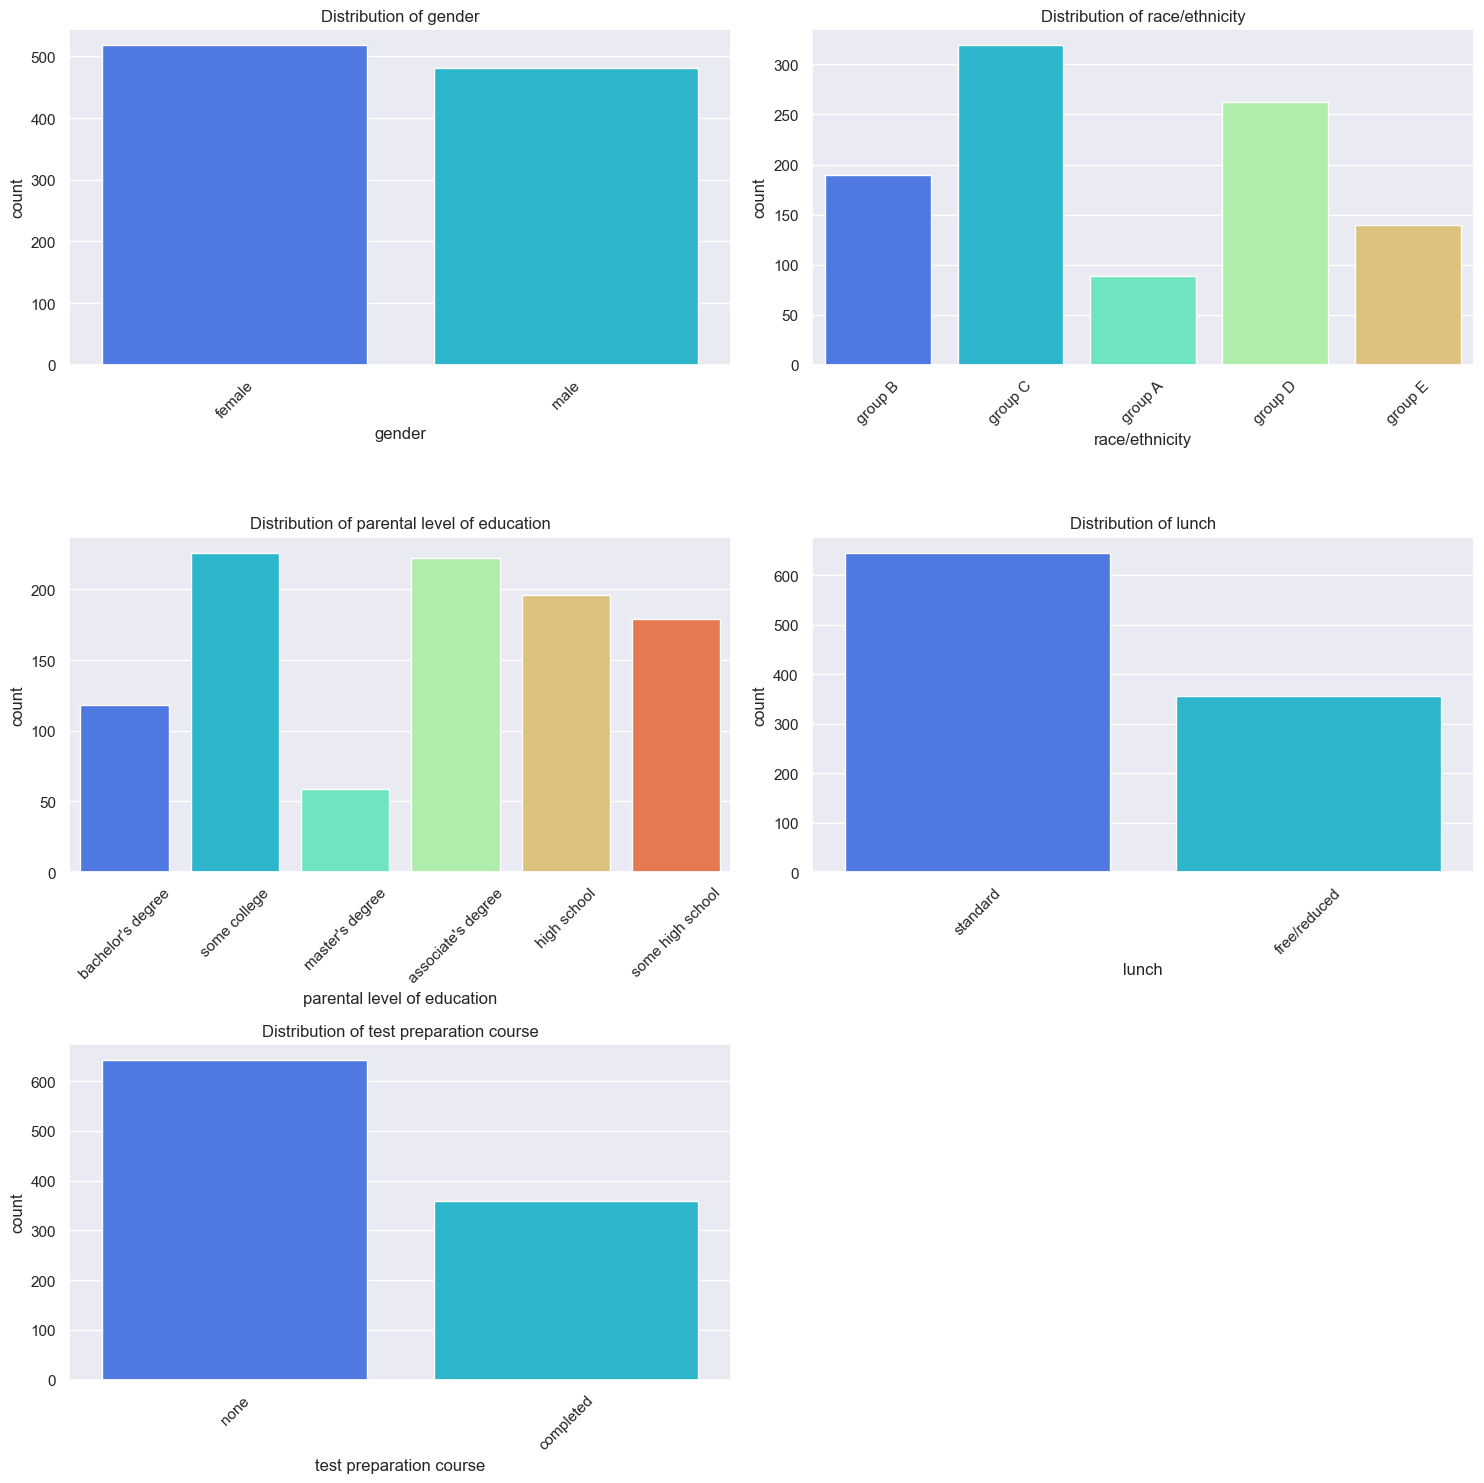

In [15]:
# Plotting distribution of categorical features
plt.figure(figsize=(15,15))
count = 0
for feature in categorical_features:
    ax = plt.subplot(3, 2, count+1)
    sns.countplot(data=df, x=feature, ax=ax)
    ax.set_title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    count += 1
plt.tight_layout()

### 3.5 Missing Values

In [16]:
# Checking if there are any missing values in any feature
df.isna().any().describe()

count         8
unique        1
top       False
freq          8
dtype: object

### 3.6 Outliers

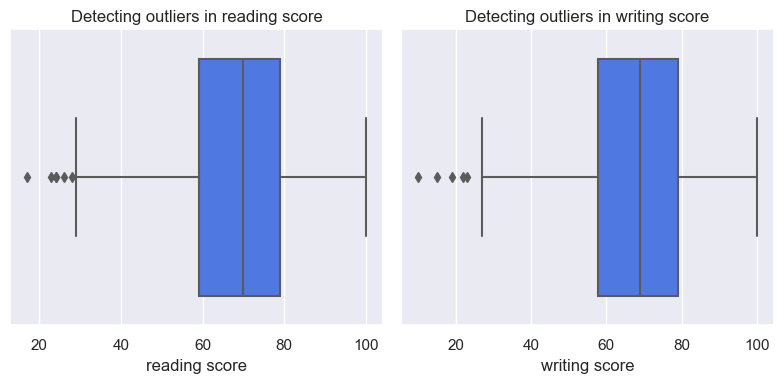

In [17]:
# Finding outliers in the numerical features
plt.figure(figsize=(8,4))
for count, feature in enumerate(numerical_features):
    ax = plt.subplot(1, 2, count+1)
    sns.boxplot(data=df, x=feature, ax=ax) 
    ax.set_title(f"Detecting outliers in {feature}")
plt.tight_layout()